# ModelNet and Thingiverse Data Visualization
In the data cards, we need to have some idea of our distribution of stuff. Let's do some visualizing!

### Imports

In [1]:
from volume_calculator import *
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import multiprocessing as mp
from tqdm import *

### Set constants

In [2]:
DATA_DIR = '/data/csc4801/KedzioraLab'
names = ['airplane','bookshelf','bottle','bowl','car','cone','cup','dresser','stairs','vase','table','flower_pot']

### Define Reading an STL

In [3]:
def read_stl(filename, material=2, unit='cm'):
    mySTLUtils = STLUtils()
    mySTLUtils.loadSTL(filename)
    material_mass = materialsFor3DPrinting().get_material_mass(material)
    v = mySTLUtils.volume(unit, material_mass)
    m = mySTLUtils.mass(unit, material_mass)
    a = mySTLUtils.area()
    t = mySTLUtils.triangles
    ta = mySTLUtils.areas
    return v,m,a,t,ta
util = STLUtils()

### Test

In [4]:
# read_stl(DATA_DIR+'/thingiverse/vase/stls/Decorative_Vase/vase_flower.stl')

## Evaluate Data

In [5]:
partition = 'ModelNet40'
df = pd.DataFrame()

all_tris = {}
all_area = {}

for name in names[:]:
    print(name)
    all_tris[name] = []
    all_area[name] = []
    for stl in tqdm(glob.glob(os.path.join(DATA_DIR,partition,name,'**','*.stl'), recursive=True)):
        try:
            (v,m,a,t,ta) = read_stl(stl)
            all_tris[name] += t
            all_area[name] += ta
            entry = pd.DataFrame({'class':name, 'volume':v, 'mass':m, 'area':a}, index=[0]) 
            df = pd.concat([df, entry], ignore_index=True)
        except Exception as e:
#                 print(e)
            pass

airplane


100%|██████████| 726/726 [06:52<00:00,  1.76it/s]


bookshelf


100%|██████████| 672/672 [01:33<00:00,  7.22it/s]


bottle


100%|██████████| 435/435 [00:41<00:00, 10.53it/s]


bowl


100%|██████████| 84/84 [00:04<00:00, 17.42it/s]


car


100%|██████████| 297/297 [03:27<00:00,  1.43it/s]


cone


100%|██████████| 187/187 [00:06<00:00, 28.60it/s] 


cup


100%|██████████| 99/99 [00:01<00:00, 71.54it/s]


dresser


100%|██████████| 286/286 [00:42<00:00,  6.68it/s]


stairs


100%|██████████| 144/144 [00:37<00:00,  3.84it/s]


vase


100%|██████████| 575/575 [01:15<00:00,  7.64it/s]


table


100%|██████████| 492/492 [00:47<00:00, 10.37it/s]


flower_pot


100%|██████████| 169/169 [01:19<00:00,  2.14it/s]


In [6]:
# df = pd.concat(dfs, ignore_index=True)
# all_tags = dict(zip(names,tags))
# all_desc = dict(zip(names,desc))
# all_tris = dict(zip(names,tris))
# all_area = dict(zip(names,area))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4166 entries, 0 to 4165
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   4166 non-null   object 
 1   volume  4166 non-null   float64
 2   mass    4166 non-null   float64
 3   area    4166 non-null   float64
dtypes: float64(3), object(1)
memory usage: 130.3+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
volume,4166.0,3.126468e+24,2.017965e+26,-4.697008e+14,1.776357e-17,1.052299,58.943707,1.302486e+28
mass,4166.0,3.908085e+24,2.522456e+26,-5.871260e+14,2.220446e-17,1.315374,73.679633,1.628108e+28
area,4166.0,9.482345e+15,6.120338e+17,1.116434e-05,3.727397e+01,197.710241,3163.017393,3.950345e+19


In [9]:
tri_areas = pd.DataFrame(columns = ['Class', 'Triangle Areas'])
for key, value in all_area.items():
    cur_df = pd.DataFrame({'Class': [key]*len(value), 'Triangle Areas': value})
    tri_areas = tri_areas.append(cur_df, ignore_index = True)

In [10]:
tri_areas.head()

,Class,Triangle Areas
0,airplane,1.646704
1,airplane,0.226051
2,airplane,0.288131
3,airplane,3.095219
4,airplane,3.088606


In [11]:
tri_areas.describe().T

,count,mean,std,min,25%,50%,75%,max
Triangle Areas,108567755.0,3.638599e+13,5.896169e+16,0.0,0.006991,0.269013,6.696606,1.326251e+20


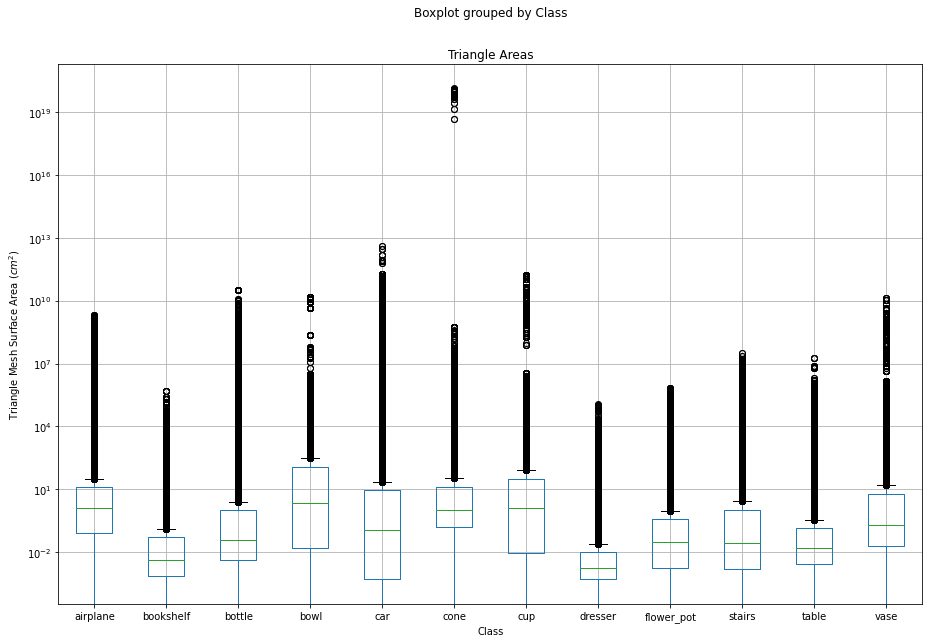

In [12]:
# get the distribution of the triangle areas
# plt.figure(figsize=(15,10))
tri_areas.boxplot(column='Triangle Areas', by="Class", figsize=(15,10))
# plt.gca().axes.get_xaxis().set_visible(False)
plt.yscale('log')
plt.ylabel("Triangle Mesh Surface Area ($cm^2$)")
plt.xlabel("Class")
pylab.show()

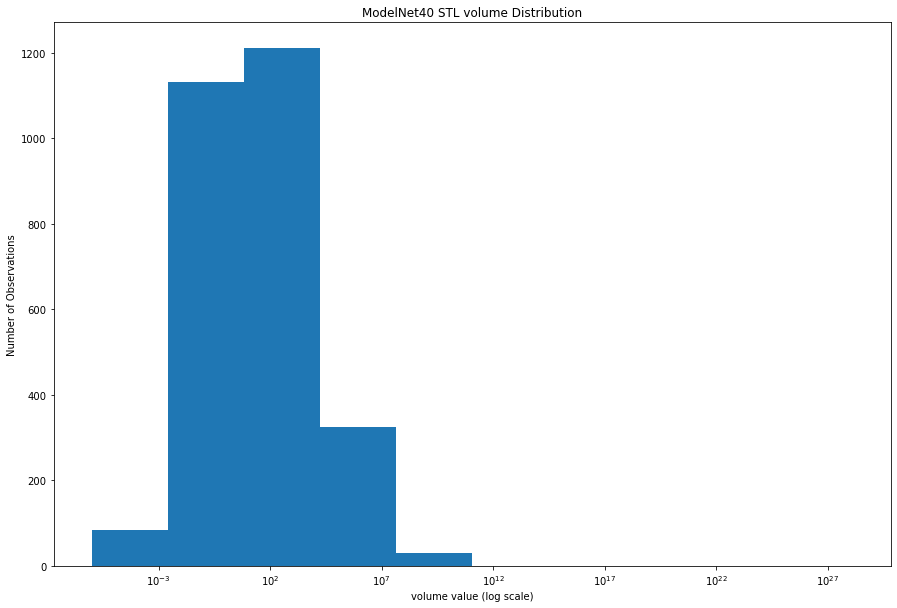

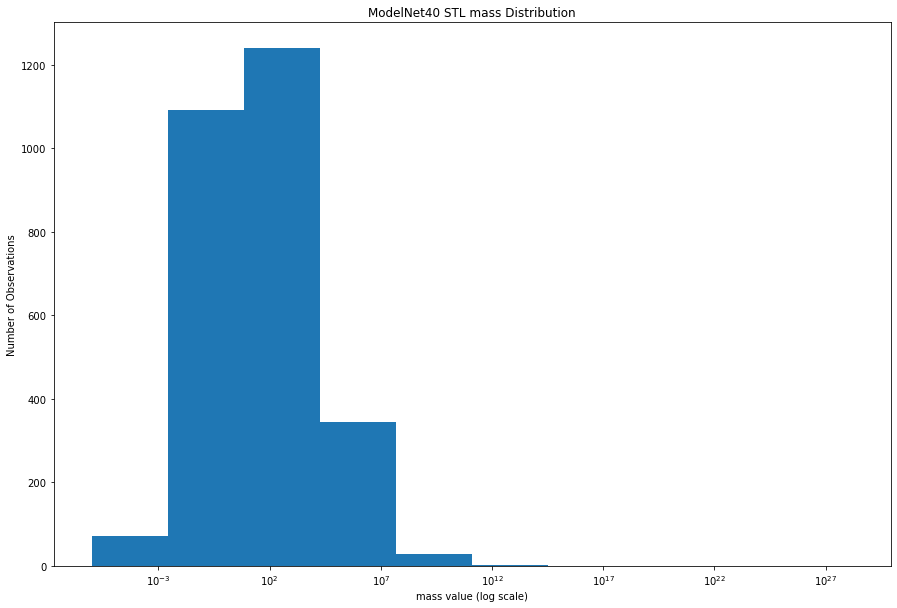

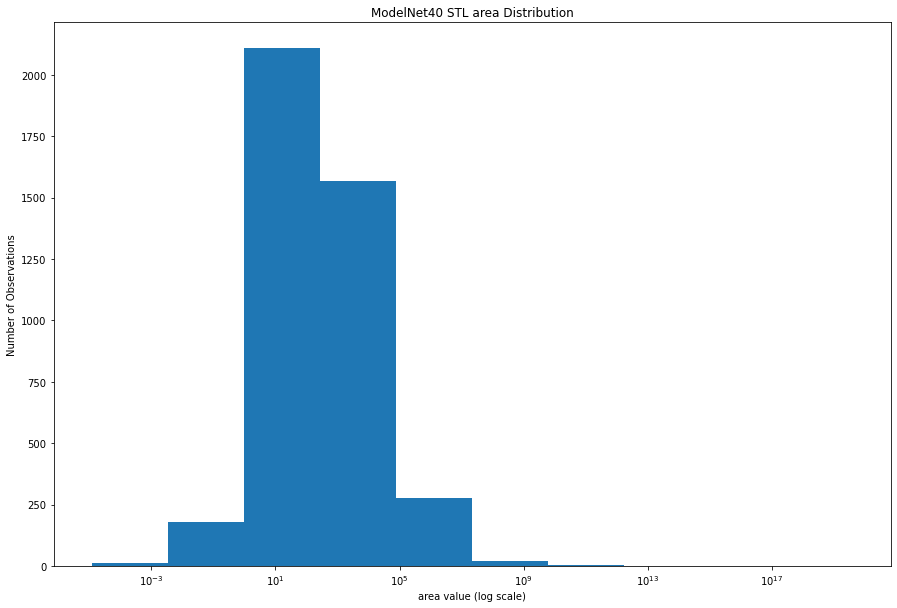

In [13]:
for col in df.columns[1:]:
    hist, bins = np.histogram(abs(df[col]), bins=10)
    logbins = np.logspace(np.log10(bins[0]+0.000001),np.log10(bins[-1]),len(bins))
    plt.figure(figsize=(15,10))
    plt.hist(df[col], bins=logbins)
    plt.title("ModelNet40 STL " + col + " Distribution")
    plt.ylabel("Number of Observations")
    plt.xlabel(col + " value (log scale)")
    plt.xscale('log')
    plt.show()

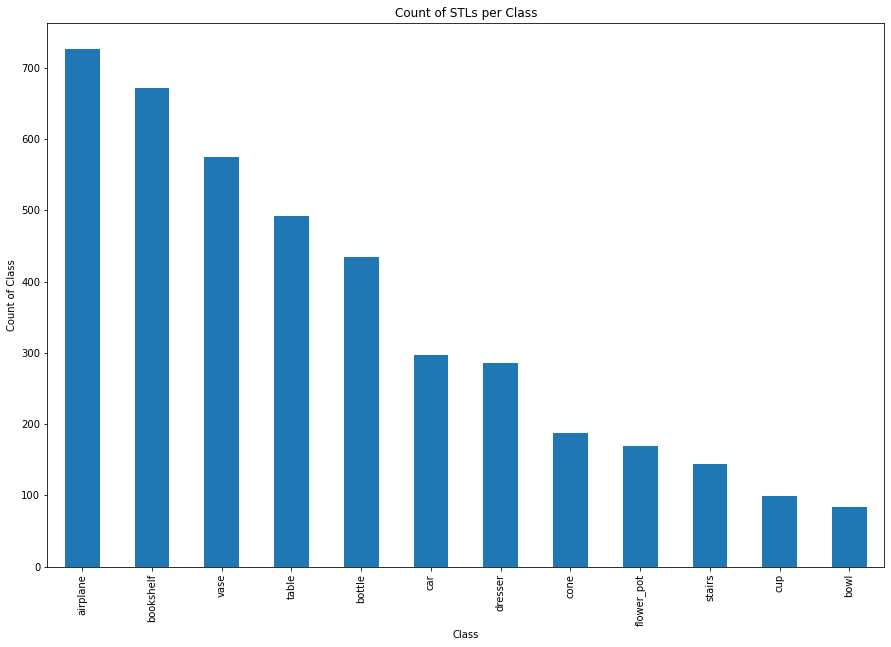

In [14]:
# get the distribution of classes
fig = plt.figure()
df['class'].value_counts().plot(kind='bar', figsize=(15,10))
plt.xlabel("Class")
plt.ylabel("Count of Class")
plt.title("Count of STLs per Class")
plt.show()

Text(0.5, 0, 'Trianlge Area Value (log scale)')

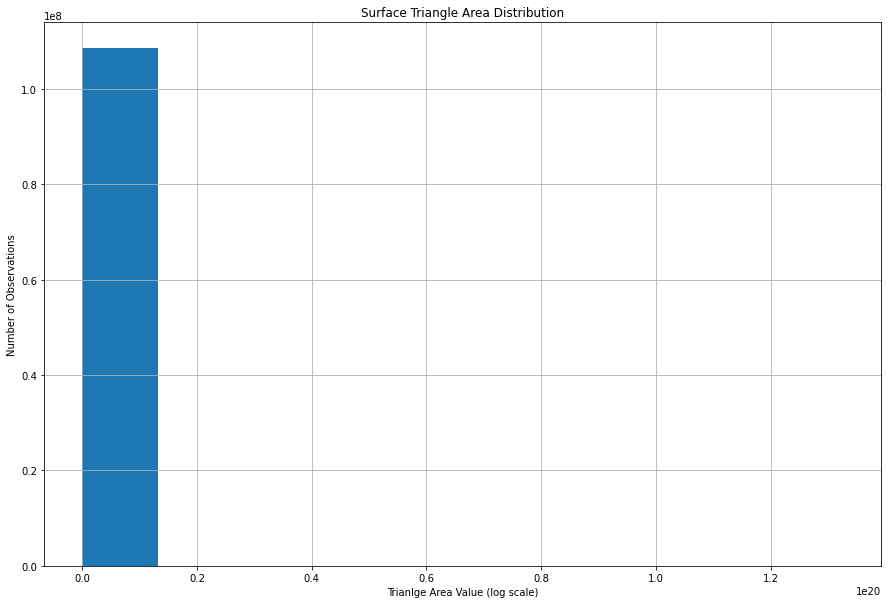

In [15]:
tri_areas.hist(figsize=(15,10))
plt.title("Surface Triangle Area Distribution")
plt.ylabel("Number of Observations")
plt.xlabel("Trianlge Area Value (log scale)")

<Figure size 432x288 with 0 Axes>

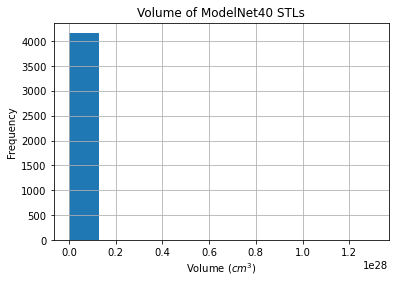

In [16]:
# Get the violin plot of the volume
fig = plt.figure()
# sns.violinplot(x=df['volume'])
# plt.xscale('log')
# plt.gca().axes.get_yaxis().set_visible(False)
df.hist(column='volume')
plt.xlabel("Volume ($cm^3$)")
plt.ylabel("Frequency")
plt.title("Volume of ModelNet40 STLs")
plt.show()

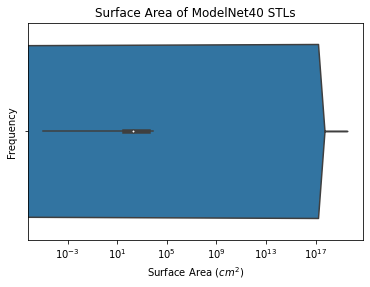

In [17]:
# get a violin plot of the surface areas
fig = plt.figure()
sns.violinplot(x=df['area'])
# plt.gca().axes.get_xaxis().set_visible(False)
plt.xscale('log')
plt.xlabel("Surface Area ($cm^2$)")
plt.ylabel("Frequency")
plt.title("Surface Area of ModelNet40 STLs")
plt.show()

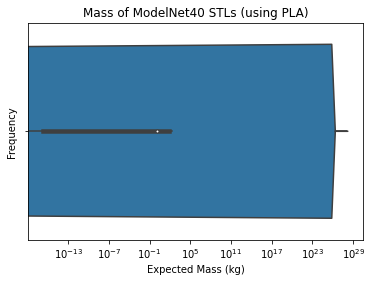

In [18]:
# get a violin plot of the Mass
fig = plt.figure()
sns.violinplot(x=df['mass'])
# plt.gca().axes.get_xaxis().set_visible(False)
plt.xscale('log')
plt.xlabel("Expected Mass (kg)")
plt.ylabel("Frequency")
plt.title("Mass of ModelNet40 STLs (using PLA)")
plt.show()

In [19]:
tri_pts = pd.DataFrame(columns = ['Class', 'X', 'Y', 'Z'])
for key, value in all_tris.items():
#     vals = np.unique(np.array(value).reshape(-1,3), axis=0)
#     vals = np.array(value).reshape(-1,3)
#     x = vals[:,0]
#     y = vals[:,1]
#     z = vals[:,2]
#     cur_df = pd.DataFrame({'X':x, 'Y':y, 'Z':z})
    cur_df = pd.DataFrame(np.array(value).reshape(-1,3), columns=['X','Y','Z'])
    cur_df['Class'] = key
    tri_pts = tri_pts.append(cur_df, ignore_index = True)

In [20]:
tri_pts.head()

,Class,X,Y,Z
0,airplane,7.57019,102.410004,27.026300
1,airplane,7.57019,102.819000,26.499201
2,airplane,12.04780,104.056000,28.295099
3,airplane,7.57019,102.819000,26.499201
4,airplane,7.57019,102.410004,27.026300


In [21]:
print(tri_pts.head())

      Class         X           Y          Z
0  airplane   7.57019  102.410004  27.026300
1  airplane   7.57019  102.819000  26.499201
2  airplane  12.04780  104.056000  28.295099
3  airplane   7.57019  102.819000  26.499201
4  airplane   7.57019  102.410004  27.026300


In [22]:
tri_pts.describe().T

,count,mean,std,min,25%,50%,75%,max
X,325703265.0,14851.619552,1.723443e+07,-6.029160e+08,-0.296874,67.274300,812.887024,4.440780e+10
Y,325703265.0,24319.053720,3.247004e+07,-6.270230e+05,1.258510,144.979996,965.018982,6.845180e+10
Z,325703265.0,4049.226268,6.802323e+06,-3.040390e+04,11.240300,70.473000,181.860001,2.455200e+10


In [23]:
# tri_pts.hist(figsize=(15,10))

In [24]:
# for col in tri_pts.columns[1:]:
#     hist, bins = np.histogram(tri_pts[col], bins=10)
#     plt.figure(figsize=(15,10))
#     plt.hist(tri_pts[col], bins=bins)
#     plt.title("ModelNet40 STL " + col + " Coordinate Distribution")
#     plt.ylabel("Number of Observations")
#     plt.xlabel(col + " Coordinate value (log scale)")
#     plt.show()

In [25]:
# # get the distribution of the triangle areas
# # plt.figure(figsize=(15,10))
# tri_pts.boxplot(by="Class", figsize=(15,10))
# # plt.gca().axes.get_xaxis().set_visible(False)
# plt.ylabel("Triangle Coordinate")
# plt.xlabel("Class")
# plt.tight_layout()
# pylab.show()

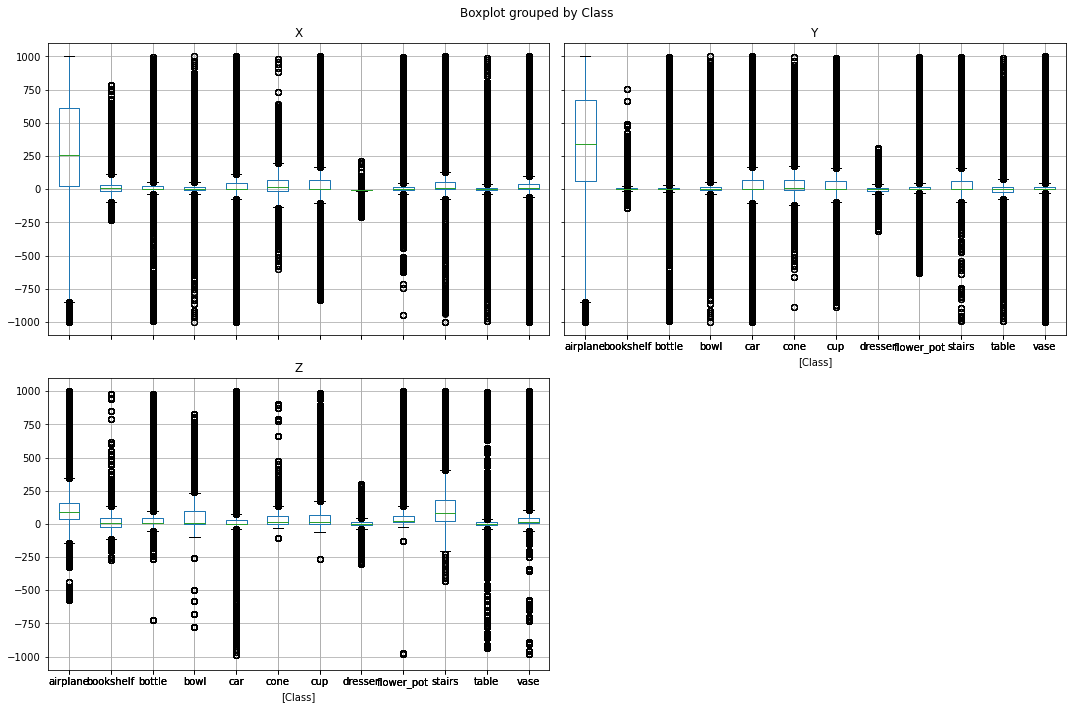

In [26]:
# get the distribution of the triangle areas
# plt.figure(figsize=(15,10))
tri_pts[(abs(tri_pts['Z'])<1000) & (abs(tri_pts['X'])<1000) & (abs(tri_pts['Y'])<1000)].boxplot(by="Class", figsize=(15,10))
# plt.gca().axes.get_xaxis().set_visible(False)
plt.ylabel("Triangle Coordinate")
plt.xlabel("Class")
plt.tight_layout()
pylab.show()

In [27]:
# partition = 'thingiverse'
# df = pd.DataFrame()

# for name in names:
#     stls = glob.glob(os.path.join(DATA_DIR,partition,name,'**','*.stl'), recursive=True)
#     for stl in stls:
#         try:
#             (v,m,a) = read_stl(stl)
#             entry = pd.DataFrame({'class':name, 'path':stl, 'volume':v, 'mass':m, 'area':a}, index=[0])
#             df = pd.concat([df, entry], ignore_index=True)
#         except Exception as e:
#             print(e)
#             pass
        
# df.to_csv(DATA_DIR+'/'+partition+'_stats.csv')

In [28]:
# def read_stl(filename, material=2, unit='cm'):
#     mySTLUtils = STLUtils()
#     mySTLUtils.loadSTL(filename)
#     material_mass = materialsFor3DPrinting().get_material_mass(material)
#     v = mySTLUtils.volume(unit, material_mass)
#     m = mySTLUtils.mass(unit, material_mass)
#     a = mySTLUtils.area()
#     pts = mySTLUtils.triangles
#     return v,m,a,pts